<a href="https://colab.research.google.com/github/cristianmarqueztrivino/gc_datalab/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Datascience Datalab

### Importación de Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import geopandas as gpd
import plotly.graph_objects as go
import json # Se importa json para manejar diccionario GeoJson

# No new libraries are strictly necessary for basic numerical analysis,
# as pandas, numpy, matplotlib, and seaborn are already imported.
# If more advanced statistical tests or specific numerical functions were needed,
# imports like scipy.stats would be added here.

### Se configura los gráficos

In [ ]:
plt.style.use("tableau-colorblind10")
sns.set_palette("Oranges")
pio.renderers.default = "colab"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Se cargan los datos y Vista inicial

In [ ]:
file_path = '/content/drive/My Drive/ULA/2025/datalab/data/20240725_Dotación_docente_2024_20240630_PUBL.csv'
df = pd.read_csv(file_path, sep=";")
df.head()

AGNO  RBD  DGV_RBD                              NOM_RBD  COD_REG_RBD  \
0  2024    1        9              LICEO POLITECNICO ARICA           15   
1  2024    2        7            PARVULARIO LAS ESPIGUITAS           15   
2  2024    3        5  ESC. PEDRO VICENTE GUTIERREZ TORRES           15   
3  2024    4        3            LICEO OCTAVIO PALMA PEREZ           15   
4  2024    5        1             JOVINA NARANJO FERNANDEZ           15   

  NOM_REG_RBD_A  COD_PRO_RBD  COD_COM_RBD NOM_COM_RBD  COD_DEPROV_RBD  ...  \
0           AYP          151        15101       ARICA             151  ...   
1           AYP          151        15101       ARICA             151  ...   
2           AYP          151        15101       ARICA             151  ...   
3           AYP          151        15101       ARICA             151  ...   
4           AYP          151        15101       ARICA             151  ...   

  DC_SUP_SOST  HH_SUP_SOST  DC_SUBDIR  HH_SUBDIR  DC_PROF_ENC  HH_PROF_ENC  \
0           0            0          0          0            0            0   
1           0            0          0          0            0            0   
2           0            0          0          0            0            0   
3           0            0          0          0            0            0   
4           0            0          0          0            0            0   

   DC_EDUC_TRAD  HH_EDUC_TRAD  DC_TOT  HH_TOT  
0             0             0      70    2477  
1             0             0      13     450  
2             0             0      26    1114  
3             0             0      73    2925  
4             1            19      66    2489  

[5 rows x 47 columns]

### Las dimensiones e información básica del dataset

In [ ]:
print("Filas: ", df.shape[0], "Columnas: ", df.shape[1],"\n")
df.info()

Filas:  16688 Columnas:  47 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16688 entries, 0 to 16687
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGNO            16688 non-null  int64 
 1   RBD             16688 non-null  int64 
 2   DGV_RBD         16688 non-null  int64 
 3   NOM_RBD         16658 non-null  object
 4   COD_REG_RBD     16688 non-null  int64 
 5   NOM_REG_RBD_A   16688 non-null  object
 6   COD_PRO_RBD     16688 non-null  int64 
 7   COD_COM_RBD     16688 non-null  int64 
 8   NOM_COM_RBD     16688 non-null  object
 9   COD_DEPROV_RBD  16688 non-null  int64 
 10  NOM_DEPROV_RBD  16688 non-null  object
 11  COD_DEPE        16688 non-null  int64 
 12  COD_DEPE2       16688 non-null  int64 
 13  RURAL_RBD       16688 non-null  int64 
 14  ESTADO_ESTAB    16688 non-null  int64 
 15  DC_A            16688 non-null  int64 
 16  HH_A            16688 non-null  int64 
 17  DC_UTP          1668

### Estadísticas Descriptivas

In [ ]:
df.describe()

AGNO           RBD       DGV_RBD   COD_REG_RBD   COD_PRO_RBD  \
count  16688.0  16688.000000  16688.000000  16688.000000  16688.000000   
mean    2024.0  13520.723394      4.508689      9.242869     94.436781   
std        0.0  10741.228879      2.872792      3.813698     37.829334   
min     2024.0      1.000000      0.000000      1.000000     11.000000   
25%     2024.0   5022.750000      2.000000      6.000000     61.000000   
50%     2024.0  10465.500000      5.000000      9.000000     91.000000   
75%     2024.0  20356.250000      7.000000     13.000000    131.000000   
max     2024.0  42278.000000      9.000000     16.000000    163.000000   

        COD_COM_RBD  COD_DEPROV_RBD      COD_DEPE     COD_DEPE2     RURAL_RBD  \
count  16688.000000    16688.000000  16688.000000  16688.000000  16688.000000   
mean    9449.945829       91.795242      2.870446      1.937021      0.295422   
std     3785.145897       36.279755      1.077617      0.987087      0.456246   
min     1101.000000       11.000000      1.000000      1.000000      0.000000   
25%     6115.750000       61.000000      2.000000      1.000000      0.000000   
50%     9117.000000       91.500000      3.000000      2.000000      0.000000   
75%    13119.000000      132.250000      3.000000      2.000000      1.000000   
max    16305.000000      151.000000      6.000000      5.000000      1.000000   

       ...   DC_SUP_SOST   HH_SUP_SOST     DC_SUBDIR     HH_SUBDIR  \
count  ...  16688.000000  16688.000000  16688.000000  16688.000000   
mean   ...      0.005932      0.218241      0.049317      2.063519   
std    ...      0.094308      3.672690      0.253035     10.773547   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      5.000000    220.000000      7.000000    308.000000   

        DC_PROF_ENC   HH_PROF_ENC  DC_EDUC_TRAD  HH_EDUC_TRAD        DC_TOT  \
count  16688.000000  16688.000000  16688.000000  16688.000000  16688.000000   
mean       0.120985      5.249521      0.047040      1.256592     16.806568   
std        0.326120     14.198410      0.272606      9.229355     23.253581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      6.000000   
75%        0.000000      0.000000      0.000000      0.000000     26.000000   
max        1.000000     44.000000     12.000000    504.000000    249.000000   

             HH_TOT  
count  16688.000000  
mean     630.596117  
std      901.714259  
min        0.000000  
25%        0.000000  
50%      213.000000  
75%      959.000000  
max    10921.000000  

[8 rows x 43 columns]

### Creación de Copia del Dataset y conteo de nulos

In [ ]:
df_clean = df.copy()
print("Valores nulos antes de limpiar:")
df_clean.isnull().sum()

Valores nulos antes de limpiar:


AGNO               0
RBD                0
DGV_RBD            0
NOM_RBD           30
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
COD_DEPE           0
COD_DEPE2          0
RURAL_RBD          0
ESTADO_ESTAB       0
DC_A               0
HH_A               0
DC_UTP             0
HH_UTP             0
DC_PDIR            0
HH_PDIR            0
DC_DIR             0
HH_DIR             0
DC_OES             0
HH_OES             0
DC_OF              0
HH_OF              0
DC_JUTP            0
HH_JUTP            0
DC_IG              0
HH_IG              0
DC_OR              0
HH_OR              0
DC_DIR_SOST        0
HH_DIR_SOST        0
DC_TP_SOST         0
HH_TP_SOST         0
DC_SUP_SOST        0
HH_SUP_SOST        0
DC_SUBDIR          0
HH_SUBDIR          0
DC_PROF_ENC        0
HH_PROF_ENC        0
DC_EDUC_TRAD       0
HH_EDUC_TRAD       0
DC_TOT             0
HH_TOT             0
dtype: int64

### Revisando cuales son los nulos
Con el **RBD** del colegio se verifica en https://mi.mineduc.cl/mvc/mime/portada y se encuentra que los 30 registros corresponden a colegios cerrados o con cambio de **RBD** por lo que el registro ya no existe, se procede a eliminarlos.

In [ ]:
filas_nulas = df_clean['NOM_RBD'].isnull()
indices_con_nulos = df_clean[filas_nulas].index
rbd_df_con_nulos = df_clean.loc[filas_nulas, ['RBD']]
print(rbd_df_con_nulos)

       RBD
2970  3676
3056  3772
3092  3811
3248  3985
3279  4020
3329  4078
3333  4082
3374  4127
3404  4159
3421  4178
3465  4227
3487  4252
3492  4257
3569  4343
3591  4367
3593  4369
3594  4370
3655  4438
3678  4464
3920  4738
3925  4743
3927  4745
3988  4815
4031  4863
4048  4884
4049  4885
4155  5004
4219  5076
4278  5141
4284  5148


### Se eliminan filas con RBD Nulos

In [ ]:
df_clean.drop(index=indices_con_nulos, inplace=True)

### Se verifica si quedan Nulos

In [ ]:
print(df_clean.isnull().sum())

AGNO               0
RBD                0
DGV_RBD            0
NOM_RBD           30
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
COD_DEPE           0
COD_DEPE2          0
RURAL_RBD          0
ESTADO_ESTAB       0
DC_A               0
HH_A               0
DC_UTP             0
HH_UTP             0
DC_PDIR            0
HH_PDIR            0
DC_DIR             0
HH_DIR             0
DC_OES             0
HH_OES             0
DC_OF              0
HH_OF              0
DC_JUTP            0
HH_JUTP            0
DC_IG              0
HH_IG              0
DC_OR              0
HH_OR              0
DC_DIR_SOST        0
HH_DIR_SOST        0
DC_TP_SOST         0
HH_TP_SOST         0
DC_SUP_SOST        0
HH_SUP_SOST        0
DC_SUBDIR          0
HH_SUBDIR          0
DC_PROF_ENC        0
HH_PROF_ENC        0
DC_EDUC_TRAD       0
HH_EDUC_TRAD       0
DC_TOT             0
HH_TOT             0
dtype: int64


### El dataset original esta aún con nulos

In [ ]:
print(df.isnull().sum())

AGNO               0
RBD                0
DGV_RBD            0
NOM_RBD           30
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
COD_DEPE           0
COD_DEPE2          0
RURAL_RBD          0
ESTADO_ESTAB       0
DC_A               0
HH_A               0
DC_UTP             0
HH_UTP             0
DC_PDIR            0
HH_PDIR            0
DC_DIR             0
HH_DIR             0
DC_OES             0
HH_OES             0
DC_OF              0
HH_OF              0
DC_JUTP            0
HH_JUTP            0
DC_IG              0
HH_IG              0
DC_OR              0
HH_OR              0
DC_DIR_SOST        0
HH_DIR_SOST        0
DC_TP_SOST         0
HH_TP_SOST         0
DC_SUP_SOST        0
HH_SUP_SOST        0
DC_SUBDIR          0
HH_SUBDIR          0
DC_PROF_ENC        0
HH_PROF_ENC        0
DC_EDUC_TRAD       0
HH_EDUC_TRAD       0
DC_TOT             0
HH_TOT             0
dtype: int64


### Variables Categóricas


Aquí se analiza las siguientes variables cualitativas:

- `COD_DEPE2`: Código de Dependencia del Establecimiento (agrupado) [1:Municipal, 2:Particular subvencionado, 3:Particular Pagado, 4:Corporación de Administración Delegada, 5:Servicio Local de Educación, 6:JUNJI]
- `RURAL_RBD`: Área geográfica en que se ubica el establecimiento [0:Rural, 1:Urbana]
- `ESTADO_ESTAB`: Estado de funcionamiento del establecimiento (1:Funcionando, 2:En receso, 3:Cerrado, 4:Autorizado sin matrícula)

Se utiliarán gráficos de barra para responder:

- Ver las composición de la dependencia administrativa en cada unidad geográfica
- Ver el conteo de establecimientos urbanos o rurales por región
- Ver el estado de los establecmientos por Región

## Obtención de GeoJSON para Mapa Geográfico

Para obtener archivo GeoJSON se opta por fuente oficial de datos en https://www.bcn.cl/siit/mapas_vectoriales, luego el Shapefile obtenido se convierte usando Herramienta `GDAL/OGR`, es una biblioteca de software libre que es un Traductor Universal para datos geoespaciales. Para la instalación se requiere igualmente instalar la libreria Python para GDAL/OGR denominada python-gdal en sistemas Debian usar comando `sudo apt install gdal-bin python3-gdal` no olvidar tener activo tu entorno de Anaconda. El comando para realizar la conversión ejecutado es: `ogr2ogr -f "GeoJSON" -simplify 100.0 Reg_Chile.geojson Regional.shp`. Con `-f "GeoJSON"` indicamos que formato deseamos obtener, con `-simplify 100.0` indicamos que necesitamos valor extremadamente simplificados, finalmente `Reg_Chile.geojson Regional.shp` primero destino y al final archivo de origen.

Finalmente copie el archivo GeoJSON a la carpeta **`data`**.

### Se mapean valores de Dependencias, Regiones y ruralidad para su uso en leyendas de gráficos

In [ ]:
mapeo_dependencia = {
    1: 'Municipal',
    2: 'Particular Subvencionado',
    3: 'Particular Pagado',
    4: 'Corporación de Administración Delegada (DL 3166)',
    5: 'Servicio Local de Educación',
    6: 'JUNJI'
}
df_clean['NOM_DEPE2'] = df_clean['COD_DEPE2'].map(mapeo_dependencia)
mapeo_region = {
    1: 'Tarapacá',
    2: 'Antofagasta',
    3: 'Atacama',
    4: 'Coquimbo',
    5: 'Valparaíso',
    6: 'Libertador General Bernardo O\'Higgins',
    7: 'Maule',
    8: 'Biobio',
    9: 'La Araucanía',
    10: 'Los Lagos',
    11: 'Aysén del General Carlos Ibáñez del Campo',
    12: 'Magallanes y de la Antártica Chilena',
    13: 'Metropolitana de Santiago',
    14: 'Los Ríos',
    15: 'Arica y Parinacota',
    16: 'Núble'
}
df_clean['NOM_REGION'] = df_clean['COD_REG_RBD'].map(mapeo_region)
mapeo_ruralidad = {
        0: 'Urbana',
        1: 'Rural'
    }
df_clean['NOM_RURALIDAD'] = df_clean['RURAL_RBD'].map(mapeo_ruralidad)

# Mapeo de códigos de región a nombres completos para el GeoJSON
mapeo_region_nombres = {
    1: 'Región de Tarapacá',
    2: 'Región de Antofagasta',
    3: 'Región de Atacama',
    4: 'Región de Coquimbo',
    5: 'Región de Valparaíso',
    6: 'Región del Libertador Gral. Bernardo O\'Higgins',
    7: 'Región del Maule',
    8: 'Región del Biobío',
    9: 'Región de La Araucanía',
    10: 'Región de Los Lagos',
    11: 'Región de Aysén del Gral. Carlos Ibáñez del Campo',
    12: 'Región de Magallanes y de la Antártica Chilena',
    13: 'Región Metropolitana de Santiago',
    14: 'Región de Los Ríos',
    15: 'Región de Arica y Parinacota',
    16: 'Región de Ñuble'
}


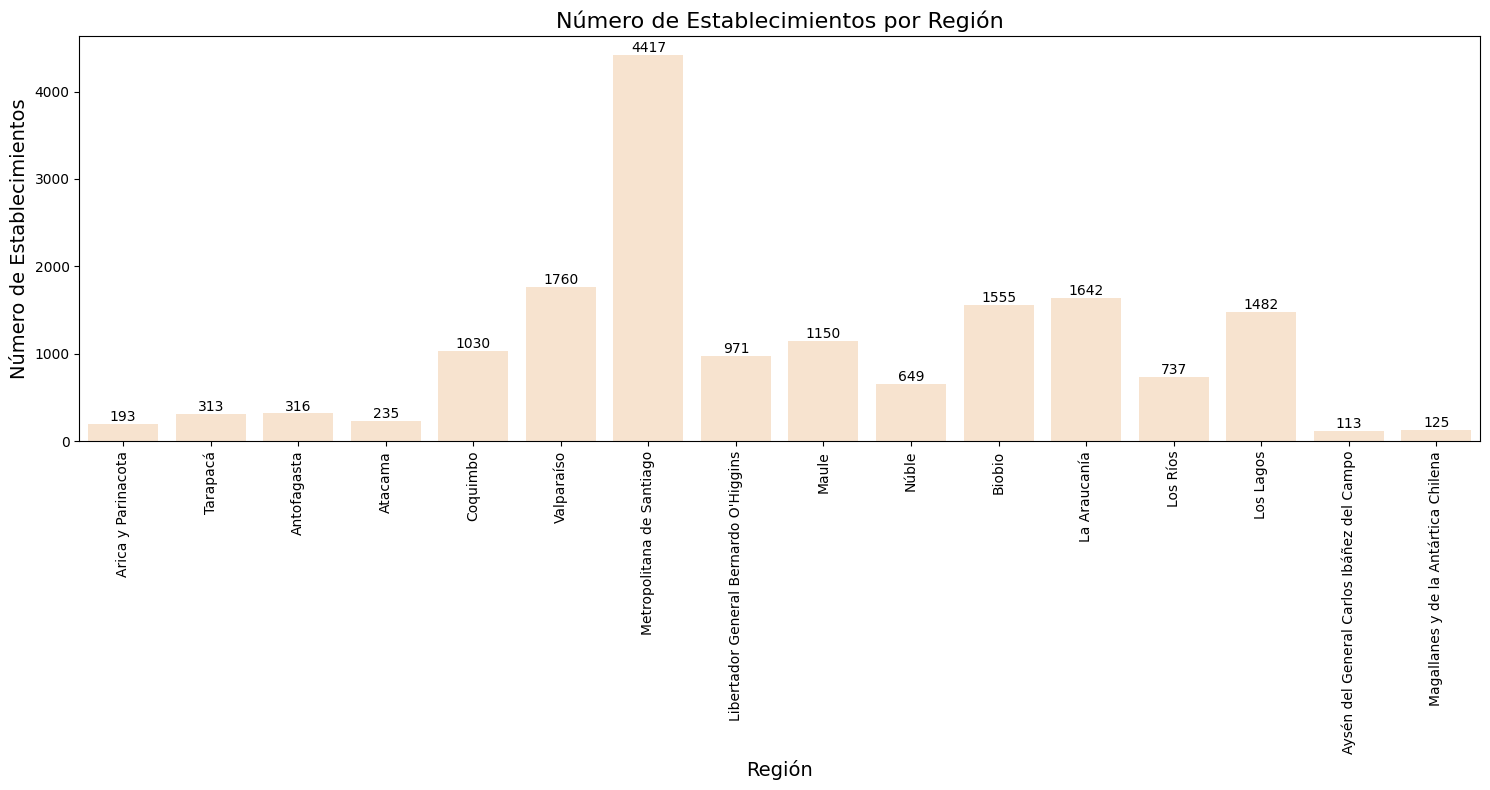

In [ ]:
# --- Gráfico de Barras con el número de establecimientos por Región
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_clean, x='NOM_REGION')
plt.title('Número de Establecimientos por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Número de Establecimientos', fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

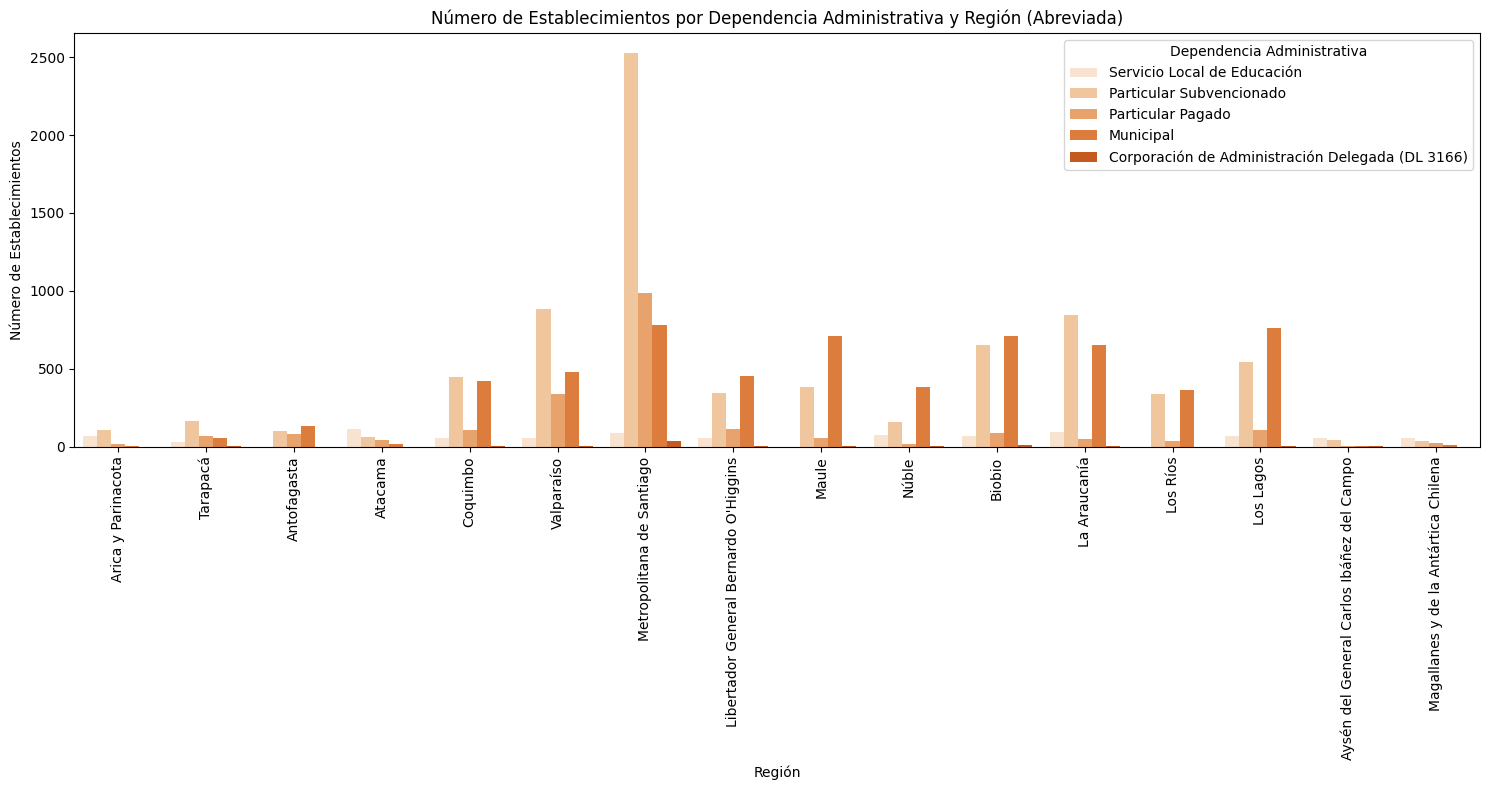

In [ ]:
# --- Gráfico de Barras Agrupadas por tipo de Dependencia por Región ---
plt.figure(figsize=(15, 8))
sns.countplot(data=df_clean, x='NOM_REGION', hue='NOM_DEPE2')
plt.title("Número de Establecimientos por Dependencia Administrativa y Región (Abreviada)")
plt.xlabel("Región")
plt.ylabel("Número de Establecimientos")
plt.xticks(rotation=90)
plt.legend(title='Dependencia Administrativa')
plt.tight_layout()
plt.show()


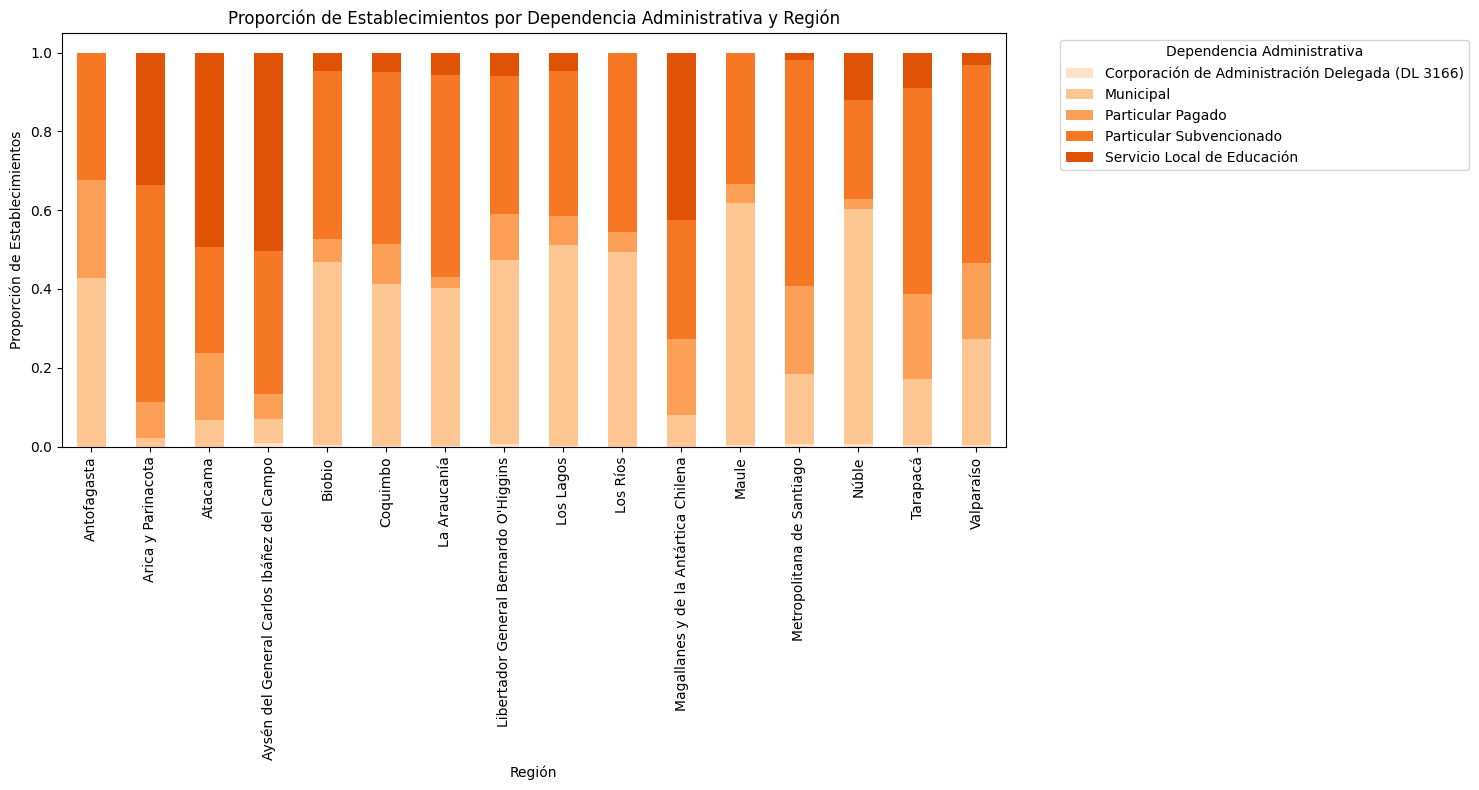

In [ ]:
# --- Gráfico de barras apiladas por tipo de Dependencia por Región ---
df_agrupada = df_clean.groupby(['NOM_REGION', 'NOM_DEPE2']).size().unstack(fill_value=0)
df_proporciones = df_agrupada.divide(df_agrupada.sum(axis=1), axis=0)
plt.figure(figsize=(15, 8))
df_proporciones.plot(kind='bar', stacked=True, figsize=(15, 8), ax=plt.gca())
plt.title("Proporción de Establecimientos por Dependencia Administrativa y Región")
plt.xlabel("Región")
plt.ylabel("Proporción de Establecimientos")
plt.xticks(rotation=90)
plt.legend(title='Dependencia Administrativa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


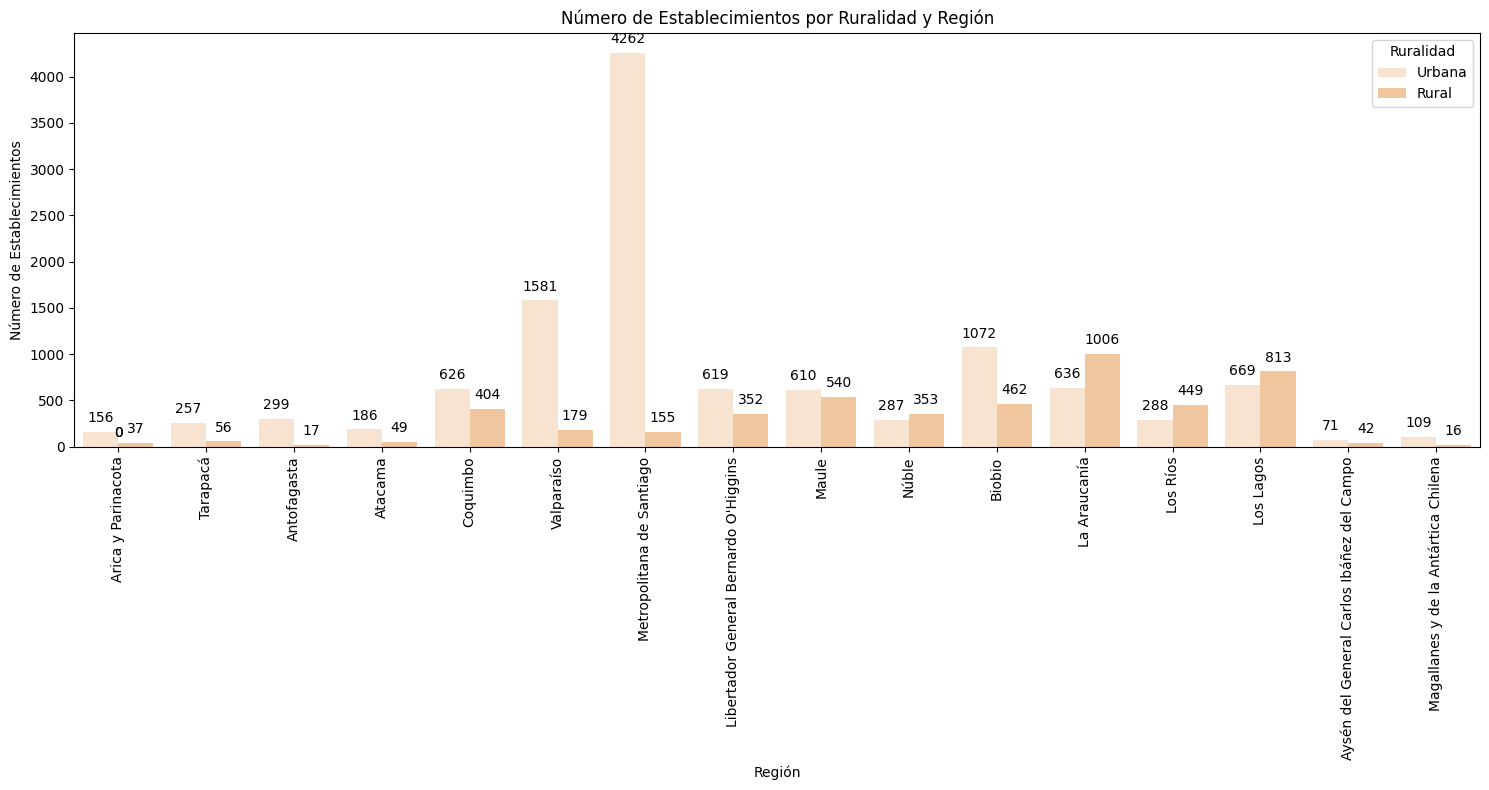

In [ ]:
# --- Gráfico de Barras Agrupadas de Ruralidad por Regiones ---
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_clean, x='NOM_REGION', hue='NOM_RURALIDAD')
plt.title("Número de Establecimientos por Ruralidad y Región")
plt.xlabel("Región")
plt.ylabel("Número de Establecimientos")
plt.xticks(rotation=90)
plt.legend(title='Ruralidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.tight_layout()
plt.show()


In [ ]:
# --- Agrupa por el código de región y calcula la proporción de ruralidad ---
df_mapa_ruralidad_region = df_clean.groupby('COD_REG_RBD').agg(
    establecimientos_rurales=('RURAL_RBD', lambda x: (x == 1).sum()),
    total_establecimientos=('RURAL_RBD', 'count')
)
df_mapa_ruralidad_region = df_mapa_ruralidad_region.reset_index()
# Calcula el porcentaje de establecimientos rurales.
df_mapa_ruralidad_region['porcentaje_rural'] = (df_mapa_ruralidad_region['establecimientos_rurales'] / df_mapa_ruralidad_region['total_establecimientos']) * 100
print(df_mapa_ruralidad_region.head())


   COD_REG_RBD  establecimientos_rurales  total_establecimientos  \
0            1                        56                     313   
1            2                        17                     316   
2            3                        49                     235   
3            4                       404                    1030   
4            5                       179                    1760   

   porcentaje_rural  
0         17.891374  
1          5.379747  
2         20.851064  
3         39.223301  
4         10.170455  


### Mapas Geográficos de Ruralidad por Región

In [ ]:
# --- Carga el archivo GeoJSON de las regiones de Chile  y crea el mapa ---
#gdf_regiones = gpd.read_file("data/Reg_Chile.geojson")
f_p = '/content/drive/My Drive/ULA/2025/datalab/data/Reg_Chile.geojson'
gdf_regiones = gpd.read_file(f_p)

# --- Diagnóstico inicial del GeoDataFrame cargado ---
print("Sistema de Referencia de Coordenadas (CRS) del GeoDataFrame cargado:")
print(gdf_regiones.crs)

print("\nPrimeras filas de la columna 'geometry' del GeoDataFrame cargado:")
print(gdf_regiones['geometry'].head())


# Convierte los tipos de datos para que coincidan antes de la unión
gdf_regiones['codregion'] = gdf_regiones['codregion'].astype('int64')

# Filtra la fila con el código de región 0
gdf_regiones_filtrado = gdf_regiones[gdf_regiones['codregion'] != 0].copy()
#Elimina el campo región ya esta repetido
del gdf_regiones_filtrado['Region']

# --- Paso 3: Mapear los datos al GeoDataFrame ---
# Crea una Serie de mapeo para el porcentaje de ruralidad
mapeo_porcentaje_rural = df_mapa_ruralidad_region.set_index('COD_REG_RBD')['porcentaje_rural']
gdf_regiones_filtrado['porcentaje_rural'] = gdf_regiones_filtrado['codregion'].map(mapeo_porcentaje_rural)

# Crea la columna de nombres para el hover_name
gdf_regiones_filtrado['nombre_para_mapa'] = gdf_regiones_filtrado['codregion'].map(mapeo_region_nombres)

# Mapa: Porcentaje de establecimientos rurales por región

gdf_regiones_filtrado['NOM_REGION'] = gdf_regiones_filtrado['codregion'].map(mapeo_region_nombres)
fig1 = px.choropleth(
    gdf_regiones_filtrado,
    geojson=gdf_regiones_filtrado,
    locations='codregion',
    color='porcentaje_rural',
    color_continuous_scale='Viridis',
    range_color=[0,50],
    #scope="south america",
    hover_name='nombre_para_mapa',
    hover_data={"porcentaje_rural": ":.1f%"},
    #featureidkey='properties.codregion',  # Especificar la propiedad de unión
    center={"lat": -33.4489, "lon": -70.6693}, # Centrado en Santiago
    labels={'porcentaje_rural': '% Establecimientos Ruralidad'},
    title='Porcentaje de Establecimientos Rurales por Región - 2024'
)

fig1.update_geos(
    fitbounds="locations",
    visible=False,
    subunitcolor="white",
    subunitwidth=0.5
)

fig1.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar={
        "title": {
            "text": "% Rural"
        }
    }
)

fig1.show()

Sistema de Referencia de Coordenadas (CRS) del GeoDataFrame cargado:
EPSG:3857

Primeras filas de la columna 'geometry' del GeoDataFrame cargado:
0    POLYGON ((-7727277 -1997231, -7719196 -2005350...
1    MULTIPOLYGON (((-7810214 -2298008, -7810198 -2...
2    MULTIPOLYGON (((-7870471 -2985679, -7870272 -2...
3    MULTIPOLYGON (((-7493638 -7542308, -7493033 -7...
4    MULTIPOLYGON (((-8413518 -6234055, -8413570 -6...
Name: geometry, dtype: geometry


### Se intenta con un scatter usando Plotly



In [ ]:
# Reproyectaremos el GeoDataFrame a EPSG:4326 (WGS84) para calcular correctamente el centroide.
# Usaremos este GeoDataFrame para obtener la geometría del fondo del mapa y calcular los centroides.
gdf_regiones_filtrado_sc = gdf_regiones_filtrado.to_crs(epsg=4326)

# Calcular centroides para cada región
gdf_regiones_filtrado_sc['centroid'] = gdf_regiones_filtrado_sc['geometry'].centroid
gdf_regiones_filtrado_sc['lon'] = gdf_regiones_filtrado_sc['centroid'].x
gdf_regiones_filtrado_sc['lat'] = gdf_regiones_filtrado_sc['centroid'].y

# Se elimina las columnas de geometría y centroide para evitar problemas de serialización JSON
gdf_regiones_filtrado_sc = gdf_regiones_filtrado_sc.drop(columns=['geometry', 'centroid'])

# Se crea un DataFrame de pandas con los datos necesarios para trazar los puntos de dispersión
df_scatter_data = gdf_regiones_filtrado_sc[['codregion', 'porcentaje_rural', 'nombre_para_mapa', 'lon', 'lat']].copy()

fig = go.Figure()

# Define el fondo geográfico usando go.Layout.geo
fig.update_layout(
    geo=dict(
        scope='south america',
        visible=True,
        subunitcolor="white",
        subunitwidth=0.5,
    ),
    title_text='Porcentaje de Establecimientos Rurales por Región - 2024 (Mapa con Burbujas)'
)

# Agregue un seguimiento geográfico disperso para las burbujas usando el DataFrame de pandas
fig.add_trace(
    go.Scattergeo(
        lon = df_scatter_data['lon'],
        lat = df_scatter_data['lat'],
        text = df_scatter_data.apply(lambda row: f"{row['nombre_para_mapa']}: {row['porcentaje_rural']:.2f}% rural", axis=1), #Texto flotante personalizado
        mode = 'markers',
        marker = dict(
            size = df_scatter_data['porcentaje_rural'] * 0.5,  #Se escala el tamaño de la burbuja por porcentaje (ajuste el multiplicador según sea necesario)
            color = df_scatter_data['porcentaje_rural'],
            colorscale = 'Oranges', #Escala de colores para las burbujas
            cmin = 0,
            cmax = 100, #Se establece que el porcentaje máximo es a 100%
            line = dict(width=0.5, color='rgba(68, 68, 68, 0)'), #Se le agrega contorno a la burbuja
            colorbar=dict(
                title='% Ruralidad'
            )
        ),
        name = '% Rural (Burbujas)'
    )
)

fig.show()


/tmp/ipython-input-3970284212.py:6: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




### Análisis de Variables Numéricas

Vamos a **identificar** las **variables numéricas** en el dataset y realizar un análisis exploratorio básico.
Para ello nos enfocaremos en sólo algunas

In [ ]:
# Identificar columnas numéricas
cols_numericas = df_clean.select_dtypes(include=np.number).columns.tolist()

# Excluir columnas que son identificadores o códigos pero son numéricas
# Basado en df.info() y df.head(), AGNO, RBD, DGV_RBD, COD_REG_RBD, COD_PRO_RBD,
# COD_COM_RBD, COD_DEPROV_RBD, COD_DEPE, COD_DEPE2, RURAL_RBD, ESTADO_ESTAB
# son códigos o identificadores y no variables numéricas para análisis estadístico típico.
cols_excluidas = ['AGNO', 'RBD', 'DGV_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'COD_DEPROV_RBD',
                  'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'DC_DIR_SOST', 'HH_DIR_SOST',
                  'DC_TP_SOST', 'HH_TP_SOST', 'DC_SUP_SOST', 'HH_SUP_SOST', 'DC_SUBDIR', 'HH_SUBDIR',
                  'DC_PROF_ENC', 'HH_PROF_ENC', 'DC_EDUC_TRAD', 'HH_EDUC_TRAD', 'DC_OES', 'HH_OES', 'DC_OF',
                  'HH_OF', 'DC_PDIR', 'HH_PDIR']

cols_numericas_analizar = [col for col in cols_numericas if col not in cols_excluidas]

print("Columnas numéricas para análisis:")
print(cols_numericas_analizar)

Columnas numéricas para análisis:
['DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_DIR', 'HH_DIR', 'DC_JUTP', 'HH_JUTP', 'DC_IG', 'HH_IG', 'DC_OR', 'HH_OR', 'DC_TOT', 'HH_TOT']


### Estadísticas Descriptivas de Variables Numéricas

Calcularemos las estadísticas descriptivas para las variables numéricas identificadas.

In [ ]:
# Estadísticas descriptivas para las columnas numéricas relevantes
display(df_clean[cols_numericas_analizar].describe())

DC_A          HH_A        DC_UTP        HH_UTP        DC_DIR  \
count  16658.000000  16658.000000  16658.000000  16658.000000  16658.000000   
mean      13.843198    510.796434      0.312703     12.705367      0.559851   
std       19.843865    760.478795      0.980207     40.664880      0.496541   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        5.000000    154.000000      0.000000      0.000000      1.000000   
75%       21.000000    765.000000      0.000000      0.000000      1.000000   
max      242.000000  10613.000000     32.000000   1271.000000      2.000000   

             HH_DIR       DC_JUTP       HH_JUTP         DC_IG         HH_IG  \
count  16658.000000  16658.000000  16658.000000  16658.000000  16658.000000   
mean      23.605235      0.319006     13.604214      0.270741     11.731420   
std       21.430000      0.557484     24.007318      0.599622     26.022721   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       40.000000      0.000000      0.000000      0.000000      0.000000   
75%       44.000000      1.000000     44.000000      0.000000      0.000000   
max       88.000000      8.000000    320.000000      9.000000    373.000000   

              DC_OR         HH_OR        DC_TOT        HH_TOT  
count  16658.000000  16658.000000  16658.000000  16658.000000  
mean       0.135851      5.685376     16.836835    631.731781  
std        0.419805     17.776811     23.263561    902.128337  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      6.000000    215.000000  
75%        0.000000      0.000000     26.000000    960.750000  
max        7.000000    308.000000    249.000000  10921.000000

### Visualización de la Distribución de Variables Numéricas

Crearemos histogramas para visualizar la distribución de algunas de las variables numéricas clave, como el total de docentes y horas.

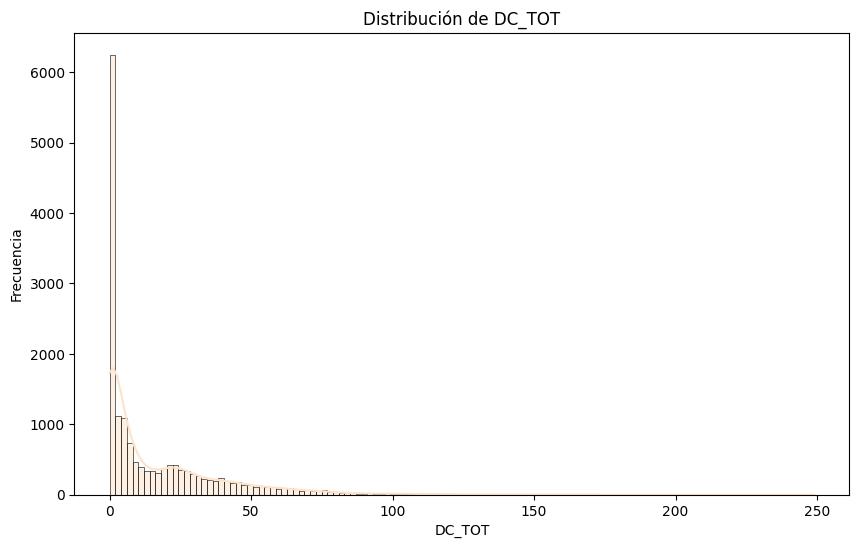

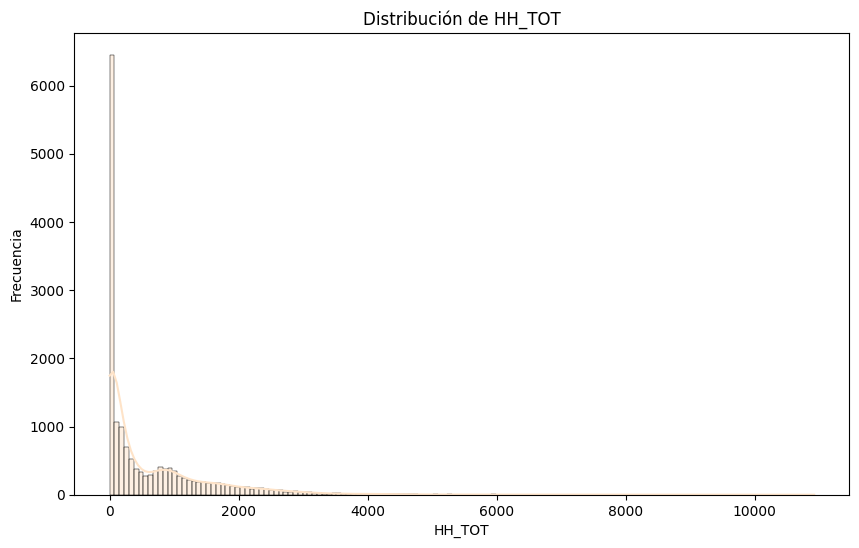

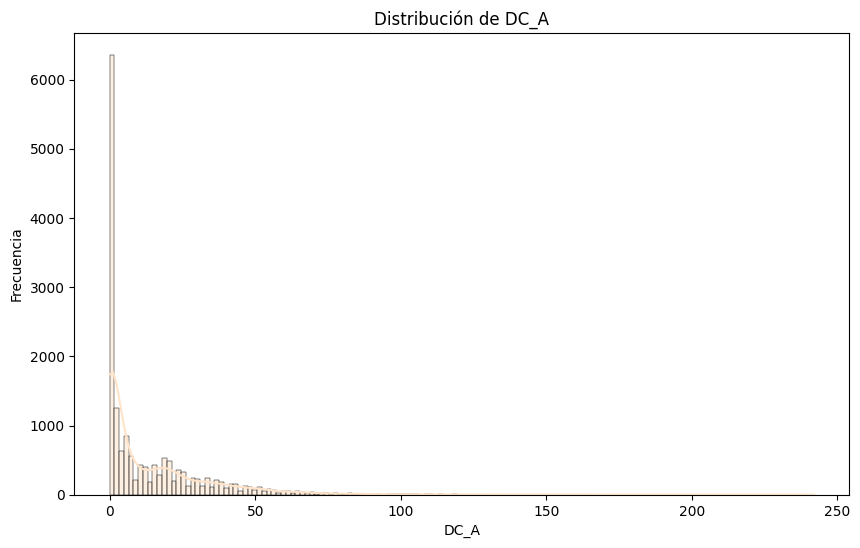

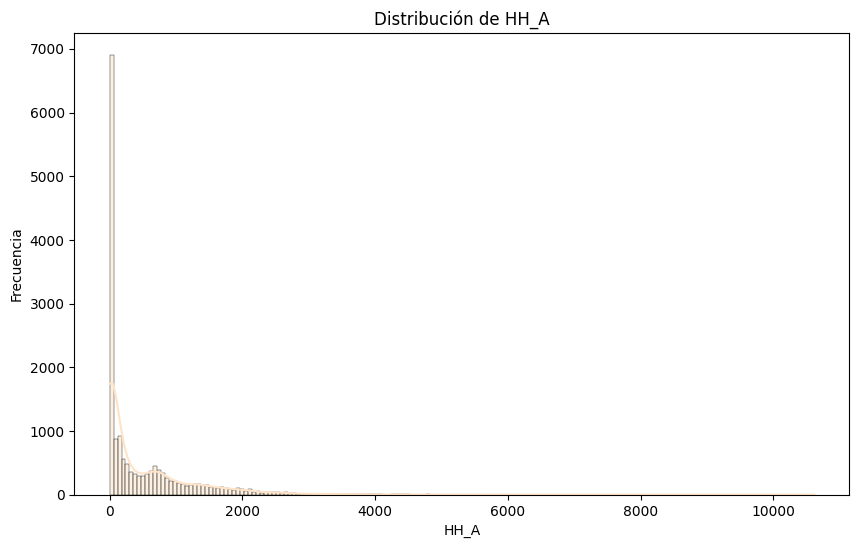

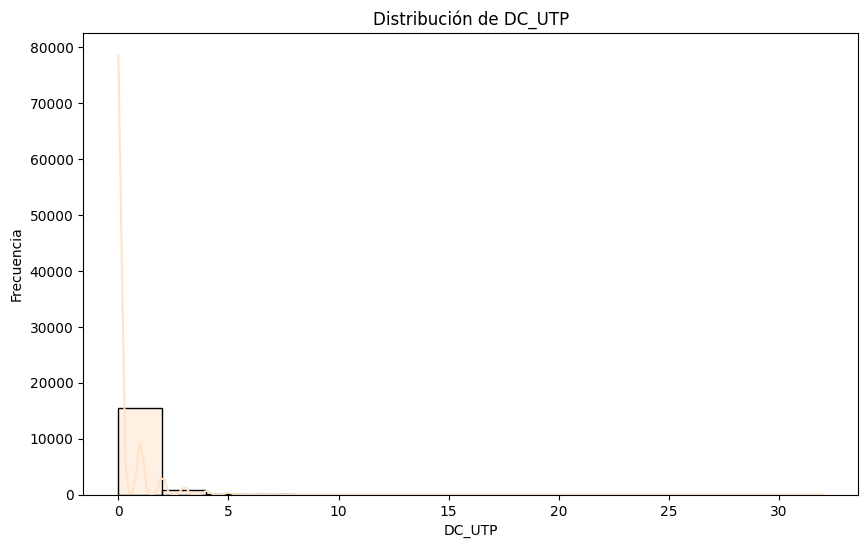

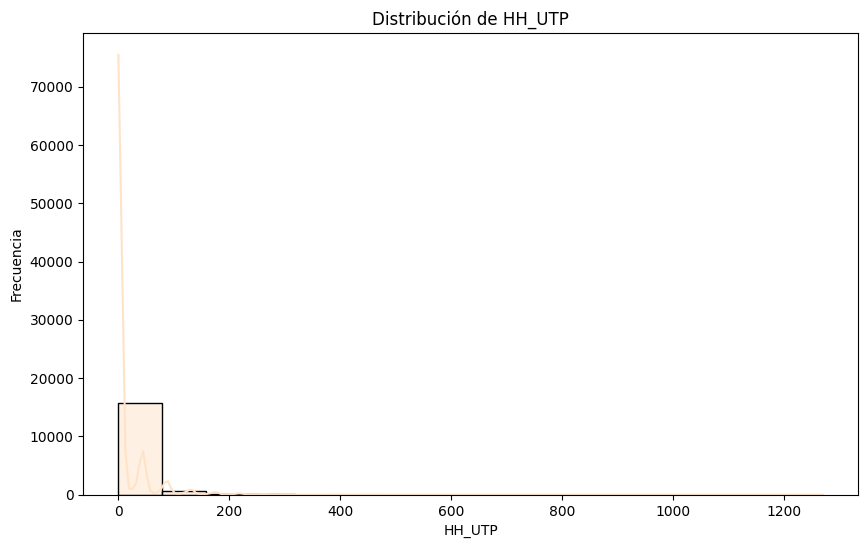

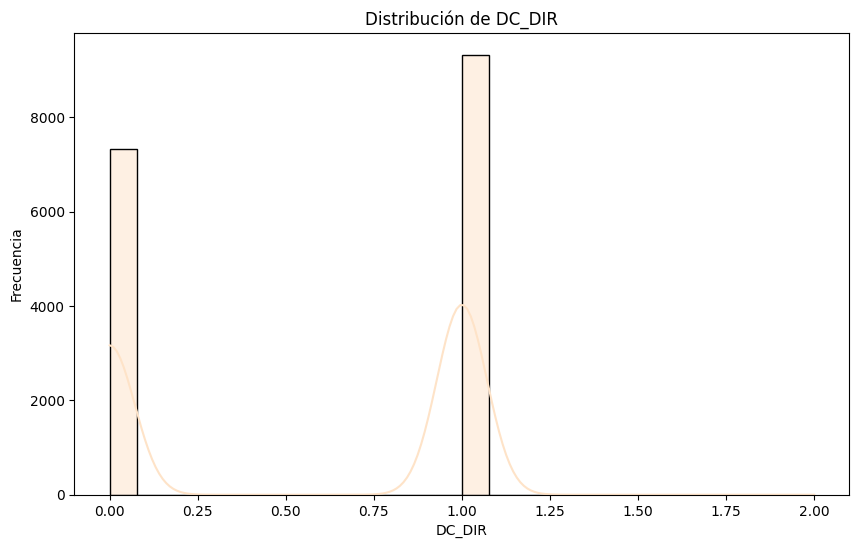

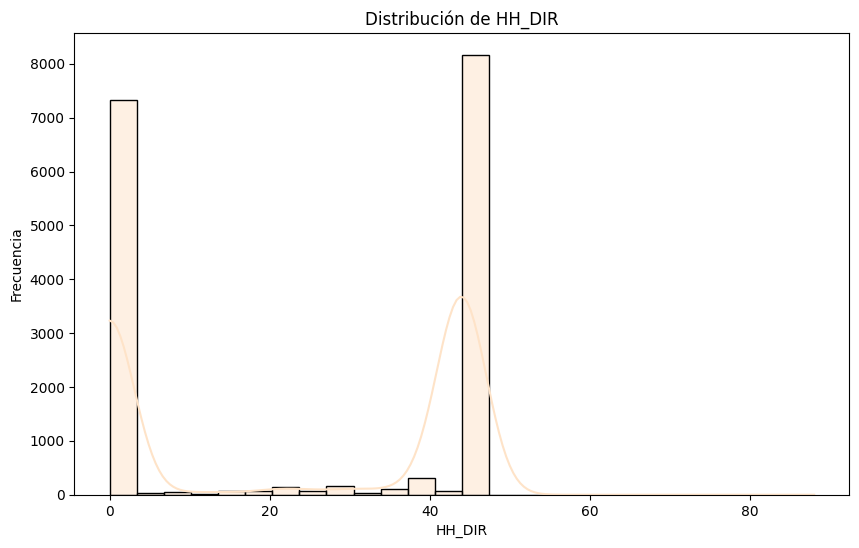

In [ ]:
# Visualizar la distribución de algunas variables numéricas clave
cols_visualizar = ['DC_TOT', 'HH_TOT', 'DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_DIR', 'HH_DIR']

for col in cols_visualizar:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

### Análisis de Correlación entre Variables Numéricas

Calcularemos la matriz de correlación para las variables numéricas identificadas y la visualizaremos usando un mapa de calor (heatmap).

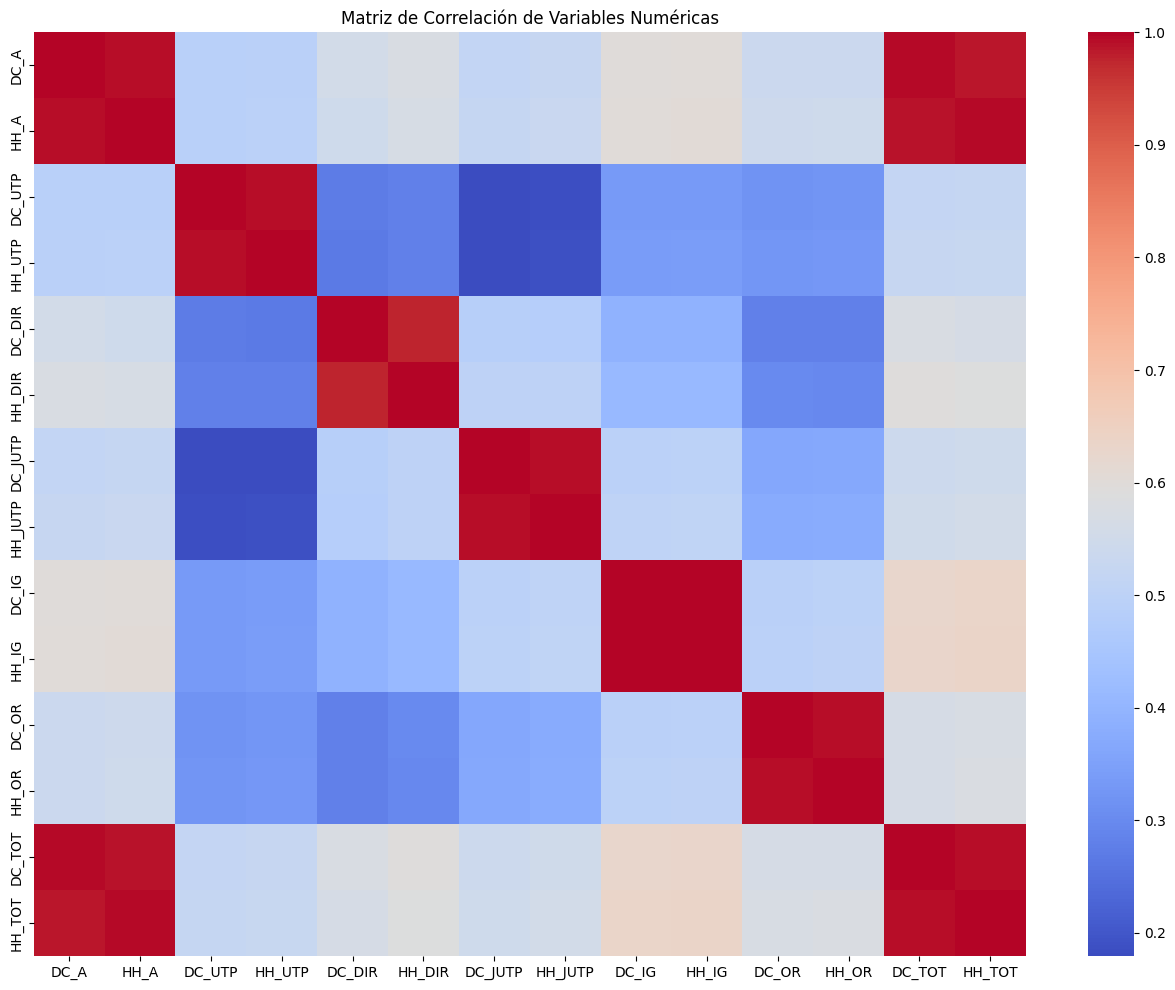

In [ ]:
# Calcular la matriz de correlación para las columnas numéricas de interés
matriz_correlacion = df_clean[cols_numericas_analizar].corr()

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Para una mejor visualización, podemos enfocarnos en subconjuntos de variables o ajustar el tamaño del gráfico si es necesario. También podemos mostrar las anotaciones (valores de correlación) en el heatmap si el número de variables es manejable.

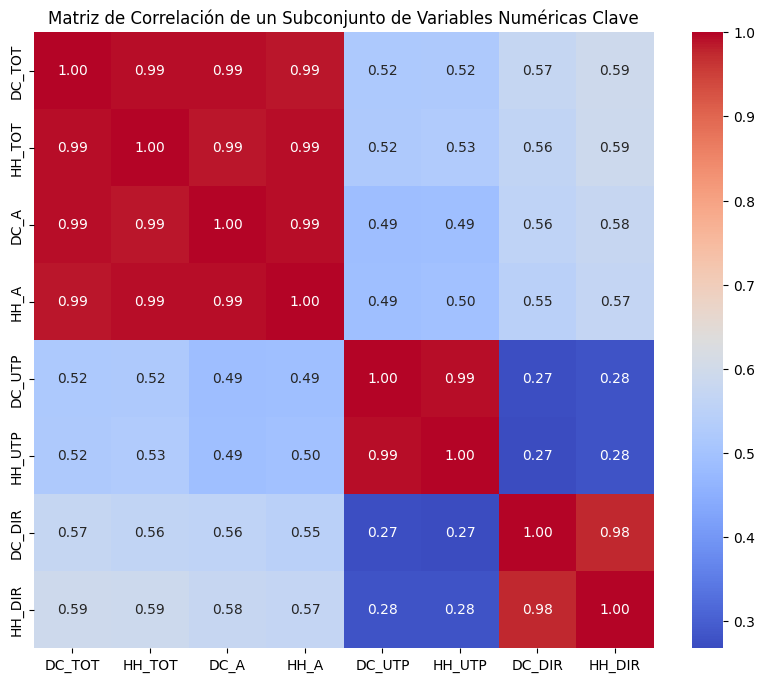

In [ ]:
# Opcional: Visualizar con anotaciones si el número de variables no es muy grande
# Seleccionar un subconjunto de variables si la matriz completa es demasiado grande para anotar
# Por ejemplo, las variables de "Total" y algunas otras clave
subset_cols = ['DC_TOT', 'HH_TOT', 'DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_DIR', 'HH_DIR']
matriz_subset = df_clean[subset_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de un Subconjunto de Variables Numéricas Clave')
plt.show()